## Chapter 6: Solution of Linear and non-linear equations (Part 2)

In this notebook we continue exploring methods of solving equations as outlined in Chapter 6. The last notebook mostly focused on solutions of systems of linear equations. It introduced an iterative process called the *relaxation method* to find solutions of nonlinear equations. For example, 
$$
f(x)=2-x+e^{-x}=0
$$. We can solve for x and recognize that solutions occur whenever
$$
x = 2-\exp^{-x}
$$. We can guess an initial value for x on the right side. Solve for x on the left with this value and substitute it back in for x on the right. Keep repeating this process and the value of x will often converge to a constant value which is the solution! 

The procedure will generally not work if
$$
\left| g^{'}\left( x \right) \right| \gt 0
$$
where the derivative here is the term on the right side (it would be the right side of $x = 2-\exp^{-x}$). If that happens you can sometimes rearrange in a way that will converge. In this example, you could rewrite $x=2-\exp^{-x}$ as $x =  -\log(2-x)$ if needed. (This isn't necessary for this particular case.)

The error for the *relaxation method* (at each iteration) is derived in the textbook where it is given by Equation 6.83
$$
\epsilon^{'} = \frac{x-x^{'}}{1-1/f^{'}(x)}
$$

This formula requires that the function is known so that its derivative can be calculated. If it is not a numerical derivative can be computed instead.

Work through Example 6.3 which is a common problem in a graduate statistical mechanics course. It requires a computational approach.

### Example 6.3 Ferromagnetism

In the mean-field theory of ferromagnetism, the strength M of magnetization of a ferromagnetic material like iron depends on temperature T according to the formula
$$
M = \mu \tanh \frac{JM}{k_{B}T}
$$
where $\mu$ is a magnetic moment, J is a coupling constant and $k_{B}$ is Boltzmann's constant. Substituting $m=M/\mu$ and $C=\mu J/k_{B}$ this becomes
$$
m = \tanh \frac{Cm}{T}
$$
m is our variable here and we want a solution for each value of T. $m=0$ will work. Are there other solutions of m, not equal to zero, for certain temperatures? Let's find out. 

### Exercise
Set $C=1$. What is the derivative of $\tanh \frac{Cm}{T}$? Use it in Equation 6.83 (also given a few equations ago). You should arrive at Equation 6.90 in the textbook. This is an estimate of the error for the *relaxation method* for our specific function. 
### ANSWER: 

$$
\frac{d}{dm}\tanh \frac{m}{T}=\frac{1}{T\cosh^2{m/T}}
$$
Applying Equation 6.83:
$$
\epsilon^{'} = \frac{m-m^{'}}{1-T\cosh^2{m/T}}
$$


### Exercise
In the next cell, code the program for ferromag.py. You can either enter the code from the textbook or download ferromag.py from the textbook website http://www-personal.umich.edu/~mejn/cp/programs.html and copy and paste. But be sure to see how the code is implemented. Use it to reproduce Figure 6.2.
### ANSWER (code in next cell)

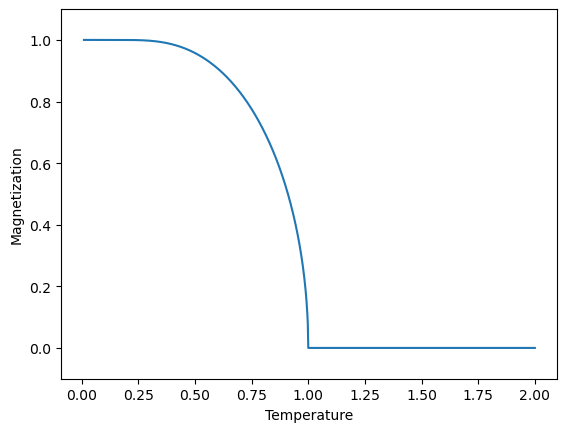

In [9]:
from math import tanh, cosh
from numpy import linspace
from pylab import plot,show,ylim, xlabel, ylabel

# Constants 
Tmax= 2.0
points = 1000
accuracy= 1e-6

# Set up lists for plotting 
y= []
temp = linspace(0.01, Tmax, points)

# Temperature loop
for T in temp: 
    m1 = 1.0
    error = 1.0
# Loop until error is small enough 
    while error>accuracy:
        m1 , m2 = tanh(m1/T), m1
        error = abs((m1-m2)/(1-T*cosh(m2/T)**2))
    y.append(m1)
# Make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperature")
ylabel("Magnetization")
show()

### Exercise
Summarize in your own words what this program is doing, how it is implementing the *relaxation method* for each value of temperature T. What is the desired accuracy required for each solution, m, for each T?
### ANSWER: The program first creates the linear space of points for the graph. Then the for loop is used to implement the relaxation method on each point of the temperature linspace. For each temperature, the magnetization starts with an initial guess of 1 and error of 1. The while loop calculates the magnetization based on the initial guess m1 and stores this initial guess into m2. Then the error is calculated using Eqn. 4.90; this repeats until the calculated error is less than the desired accuracy, $10^{-6}$. The results are stored in the y list and plotted on the magnetization vs. temperature graph.



We interpret the graph as follows. At lower temperatures, below T=1, the magnet is relatively cold. The colder it is, the more magnetized it is. The magnetic moments are more aligned. As the temperature increases, thermal motion disrupts the alignment more and more. The magnetization decreases. At a *critical temperature* (T=1 in this case) there is no longer magnetization. This is one example of a *phase transition* in a material. 

### Relaxation method for two or more variables

This method is straightforward to extend to more variables. If you have two variables write equations
$$
x = f(x,y) \\
y = g(x,y)
$$
Do the same procedure but guess initial values for both x and y. Insert them on the right side of both equations and compute a new value of x and y on the left. substitute these back in on the right. Repeat.

The process is the same for N variables. The same issues with convergence may arise. If the method does not converge you may try rearranging the equations, as was the case with one variable.


### Binary Search

If you have a smooth, continuous funtion which changes signs (crosses zero) in some interval from $x_{1}$ to $x_{2}$, there must be a solution in that interval. $f(x)=0$ are the solutions we are looking for!

You may graph your function to get a rough idea of the interval to start with. Or in other cases you can automate the procedure. This process is efficient at getting a solution but has the disadvantage that it only works for one variable.

The process is as follows:
1. Choose an interval $x_{1}$ and $x_{2}$. Verify that $f(x_{1})$ and $f(x_{2})$ do have opposite signs. Select a target accuracy.
2. Calculate the midpoint $x^{'} = \frac{1}{2}(x_{1}+x_{2})$ and evaluate the function f(x^{'}).
3. If $f(x^{'})$ is the same sign as $f(x_{1})$ the root is between $x^{'}$ and $x_{2}$ (so set $x_{1}=x^{'}$). Otherwise, it is between $x_{1}$ and $x^{'}$  (so set $x_{2}=x^{'}$). (Either way you have narrowed the interval which contains the solution by half!)
4. If $|x_{1}-x_{2}|$ is larger than the chosen accuracy repeat from Step 2. Otherwise, compute $\frac{1}{2}(x_{1}+x_{2})$ one more time to get your final estimate of the solution.

This process is quite efficient. There are caveats however. The method does not work if your starting interval contains multiple solutions. It also does not work if the interval has a solution that only touches zero at a single point. That is , the minimum is zero but it never changes between positive and negative values. In these cases, it may help to graph a function to get an idea of values to choose for your initial interval and see what is happening.

Note that a valid graphical method of finding a solution is: simply graph the function, then zoom in repeatedly until you can read the solution off the graph. But a numerical caluclation can be much faster and can be done quickly and repeadly by a computer.

### Newton's Method

This is an even more efficient method than the *relaxation method*. That is, it converges to the solution even faster. Rather than an interval, you choose one initial guess for the solution. Compute the derivative (tangent line) at that point. Find $x^{'}$, where the derivative (tangent line) equals zero. Evaluate $f(x)$ and $f^{'}(x)$ at that location. Repeat. It may be helpful to refer to Figure 6.6 in the text for the following discussion.

Equation 6.95 from the text:
$$
f^{'}(x) = \frac{f(x)}{\Delta x}
$$
Equation 6.96 from the
$$
x^{'} = x - \Delta x = x - \frac{f(x)}{f^{'}(x)}
$$
where we substituted for $\Delta x$ using Equation 6.95. $x^{'}$ is often closer to the actual solution x*, so $x^{'}$ becomes your new "guess" value of x. If we know the function, its derivative and an initial value x, Newton's method will often converge to the nearest root. If there is more than one root you may have to try other initial values of x.

An estimate of the error can also be derived for Newton's method (Equation 6.100).

There are three main problems that can arise with Newton's method. First, we must know the derivative. If we do not know what the derivative is, we can use a numerical integration technique. Second, the solution may not converge. That means that the error increases as more iterations are used, rather than decreasing. Third, if there is a local minimum or maximum near the initial guess, the derivative may point you toward that, instead of toward the zero. These usually cause strange anwswers which are obviously incorrect. 

In short, each method has advantages and disadvantages. It is best to understand multiple methods so you can choose one that works for a specific situation.

**NOTE:** Occassionally in physics, we run across a higher order polynomial which we don't know the solve. This or another method may be applied. Exercise 6.15 has you compute the roots of a $6^{th}$ order polynomial using computational techniques we have been discussing. If you ever encounter such a polynomial, consider the techniques we are learning about in Chapter 6.

### The secant method
This is an adaptation from Newton's method for cases where an analytical derivative does not exist but a numerical integration is used instead.

### Newton's method with more than one variable.
Newton's method can be extended to multiple variables. The derivation is outlined in Section 6.3.7 in the textbook and is quite similar to the case for one variable. A complication is that we must deal with vector and matrix quantities.